### Created by Mingyu (Bert) Liu

# 1. Problem Identification

The consumers' reviews are valuable to manager.But it is very expensive if judging each on by person. I develop NLP classification models that can classify negative reviews for restaurant managers, help the manager save time on absorbing information, help restaurants improve the business.

The data are from Kaggle.com-"Restaurant reviews for nlp".

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

In [3]:
df.shape

(1000, 2)

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# 2. Cleaning the text data

In [6]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Step 1: Convert to lowercase
df['Review'] = df['Review'].str.lower()

# Step 2: Remove punctuation
df['Review'] = df['Review'].str.translate(str.maketrans('', '', string.punctuation))

# Step 3: Remove numbers
df['Review'] = df['Review'].str.replace(r'\d+', '', regex=True)

# Step 4: Remove stopwords
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Step 5: Tokenize
df['Review'] = df['Review'].apply(word_tokenize)

# Step 6: Lemmatize
lemmatizer = WordNetLemmatizer()
df['Review'] = df['Review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Step 7: Rejoin tokens into a string
df['Review'] = df['Review'].apply(lambda x: ' '.join(x))

# Step 8: Remove extra whitespace (optional but good practice)
df['Review'] = df['Review'].str.strip()

# Check the cleaned dataframe
print(df.head())

                                              Review  Liked
0                                    wow loved place      1
1                                         crust good      0
2                                tasty texture nasty      0
3  stopped late may bank holiday rick steve recom...      1
4                         selection menu great price      1


# 3. Exploratory data analysis

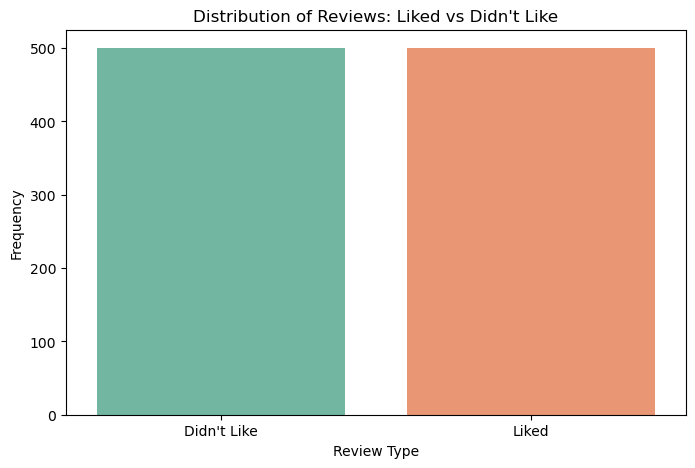

In [7]:
# Step 1: Count the number of liked and didn't like reviews
liked_count = df['Liked'].value_counts()

# Step 2: Plot the distribution of reviews using a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=liked_count.index, y=liked_count.values, palette='Set2')

# Step 3: Set labels and title
plt.xticks([0, 1], ['Didn\'t Like', 'Liked'])  # Customize x-axis labels
plt.xlabel('Review Type')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews: Liked vs Didn\'t Like')

# Display the plot
plt.show()

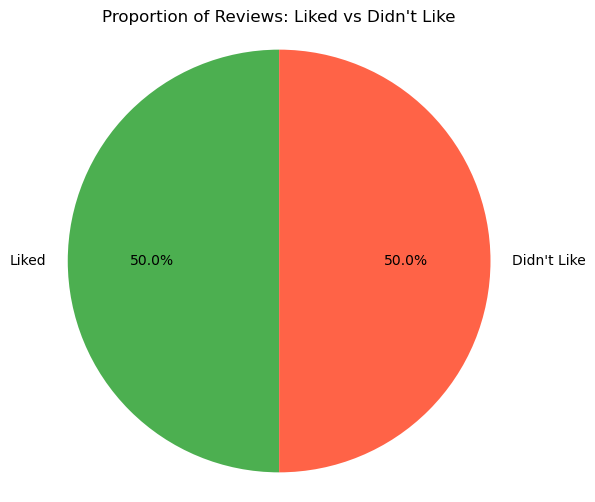

In [8]:
# Create labels and sizes for the pie chart
labels = ['Liked', 'Didn\'t Like']
sizes = [liked_count[1], liked_count[0]]  # [Count of people who liked, didn't like]

#  Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF6347'])
plt.title("Proportion of Reviews: Liked vs Didn't Like")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

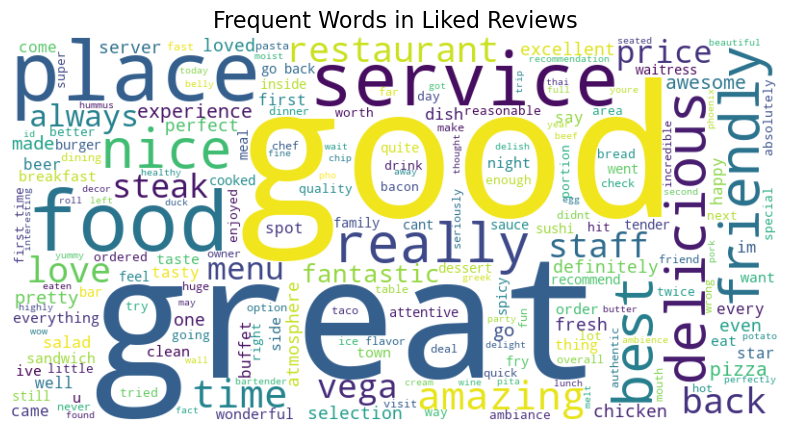

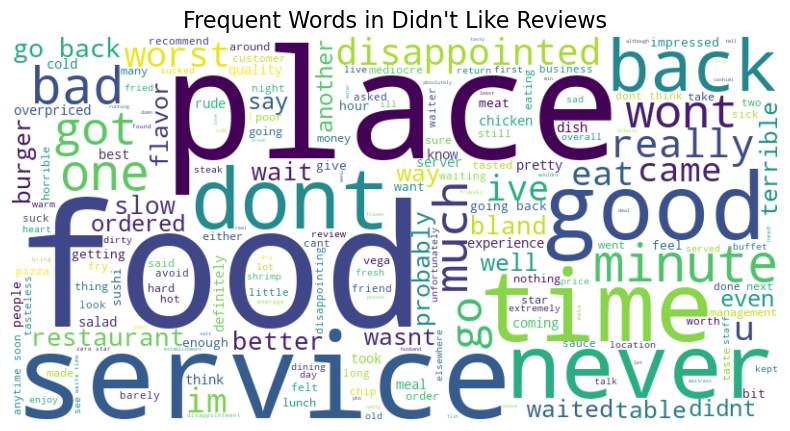

In [9]:
from wordcloud import WordCloud

# Step 1: Subset the data into 'Liked' and 'Didn't Like'
liked_reviews = df[df['Liked'] == 1]['Review'].str.cat(sep=' ')
not_liked_reviews = df[df['Liked'] == 0]['Review'].str.cat(sep=' ')

# Step 2: Generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Step 3: Display the word cloud for 'Liked' reviews
generate_wordcloud(liked_reviews, 'Frequent Words in Liked Reviews')

# Step 4: Display the word cloud for 'Didn\'t Like' reviews
generate_wordcloud(not_liked_reviews, 'Frequent Words in Didn\'t Like Reviews')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Top 10 words in disliked reviews:
         word  count
365     food     65
572    place     51
68      back     38
717  service     38
500     like     29
865     time     29
401       go     26
254     dont     25
406     good     22
543    never     22


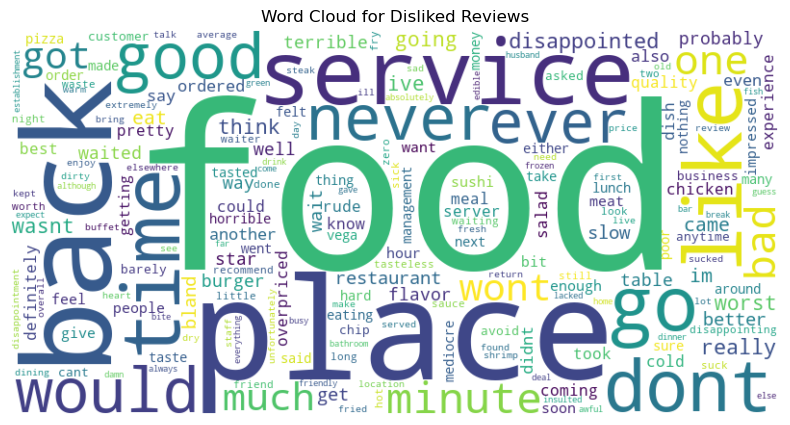

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

disliked_reviews = df[df['Liked'] == 0]['Review'].tolist()  # Convert to list

# Step 2: Convert the text into a numerical format using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X_disliked = vectorizer.fit_transform(disliked_reviews)

# Step 3: Sum the word counts for each word across all reviews
word_counts = X_disliked.sum(axis=0).A1  # A1 converts matrix to an array
words = vectorizer.get_feature_names_out()

# Create a DataFrame with words and their corresponding counts
word_freq_df = pd.DataFrame({'word': words, 'count': word_counts})

# Step 4: Find the top 10 words
top_words_df = word_freq_df.sort_values(by='count', ascending=False).head(10)

# Display the top 10 words
print("Top 10 words in disliked reviews:\n", top_words_df)

# Step 5: Generate a word cloud for the disliked reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(words, word_counts)))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud for Disliked Reviews')
plt.show()

# 4. Pre-processing and Training Data Development

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Split the data into training and testing sets
X = df['Review']
y = df['Liked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Convert the text into a bag-of-words representation
vectorizer = CountVectorizer(max_features=1000)  # Limiting to top 1000 words
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. Modeling and evaluation

### 5.1 Logistic Regression model

In [13]:
# Step 3: Build a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 76.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.84      0.78        96
           1       0.83      0.69      0.75       104

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200



### 5.2  xgboost to build NLP models

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords

# Step 2: Convert the text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)  # Convert text into numerical features (1000 most important words)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 3: Build an XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

# Step 4: Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Step 5: Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb * 100:.2f}%")

# Classification report with focus on detecting negative reviews (Label 0)
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=['Negative', 'Positive']))

# Confusion matrix to assess false positives/negatives
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Comparison with Logistic Regression (optional, if you ran the previous model)

C:\Users\myliu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 66.00%

XGBoost Classification Report:
               precision    recall  f1-score   support

    Negative       0.61      0.80      0.69        96
    Positive       0.74      0.53      0.62       104

    accuracy                           0.66       200
   macro avg       0.68      0.67      0.66       200
weighted avg       0.68      0.66      0.65       200


XGBoost Confusion Matrix:
 [[77 19]
 [49 55]]


In [15]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning with GridSearchCV
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=XGBClassifier(eval_metric='mlogloss'), param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_tfidf)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Best parameters found from GridSearchCV
best_params = {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}

# Step 1: Instantiate the XGBoost model with the best parameters
best_xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')

# Step 2: Train the model using the training data (TF-IDF features)
best_xgb_model.fit(X_train_tfidf, y_train)

# Step 3: Make predictions on the test set
y_pred_best = best_xgb_model.predict(X_test_tfidf)

# Step 4: Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized XGBoost Model Accuracy: {accuracy_best * 100:.2f}%")

# Classification report with focus on detecting negative reviews (Label 0)
print("\nOptimized XGBoost Classification Report:\n", classification_report(y_test, y_pred_best, target_names=['Negative', 'Positive']))

# Confusion matrix to assess false positives/negatives
print("\nOptimized XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Optimized XGBoost Model Accuracy: 68.50%

Optimized XGBoost Classification Report:
               precision    recall  f1-score   support

    Negative       0.62      0.88      0.73        96
    Positive       0.82      0.51      0.63       104

    accuracy                           0.69       200
   macro avg       0.72      0.69      0.68       200
weighted avg       0.72      0.69      0.68       200


Optimized XGBoost Confusion Matrix:
 [[84 12]
 [51 53]]


C:\Users\myliu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:29:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 5.3 build decision tree model

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords

# Step 2: Convert the text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)  # Convert text into numerical features (1000 most important words)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 3: Build a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_tfidf, y_train)

# Step 4: Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test_tfidf)

# Step 5: Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Model Accuracy: {accuracy_tree * 100:.2f}%")

# Classification report with focus on detecting negative reviews (Label 0)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_tree, target_names=['Negative', 'Positive']))

# Confusion matrix to assess false positives/negatives
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

Decision Tree Model Accuracy: 71.50%

Decision Tree Classification Report:
               precision    recall  f1-score   support

    Negative       0.68      0.77      0.72        96
    Positive       0.76      0.66      0.71       104

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200


Decision Tree Confusion Matrix:
 [[74 22]
 [35 69]]


In [18]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning with GridSearchCV
params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_tree.fit(X_train_tfidf, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search_tree.best_params_)

# Predict using the best model
best_tree_model = grid_search_tree.best_estimator_
y_pred_best_tree = best_tree_model.predict(X_test_tfidf)

# Evaluate the tuned Decision Tree model
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
print(f"Optimized Decision Tree Model Accuracy: {accuracy_best_tree * 100:.2f}%")

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Optimized Decision Tree Model Accuracy: 63.50%


### 5.4 build random forest model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords

# Step 2: Convert the text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)  # Convert text into numerical features (1000 most important words)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 3: Build a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
random_forest_model.fit(X_train_tfidf, y_train)

# Step 4: Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_tfidf)

# Step 5: Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")

# Classification report with focus on detecting negative reviews (Label 0)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Negative', 'Positive']))

# Confusion matrix to assess false positives/negatives
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Accuracy: 72.00%

Random Forest Classification Report:
               precision    recall  f1-score   support

    Negative       0.65      0.89      0.75        96
    Positive       0.84      0.57      0.68       104

    accuracy                           0.72       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.72      0.71       200


Random Forest Confusion Matrix:
 [[85 11]
 [45 59]]


### 5.5 build deep learning model

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.utils import to_categorical

# Step 2: Tokenize and pad the text data
max_words = 1000  # Maximum number of unique words to consider
max_len = 100  # Maximum length of input sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Step 3: Build a Sequential Model with Embedding and LSTM layers
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Embedding layer
model.add(LSTM(100, return_sequences=True))  # LSTM layer
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(LSTM(50))  # Another LSTM layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Step 5: Make predictions on the test set
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluate the model
accuracy_dl = accuracy_score(y_test, y_pred)
print(f"Deep Learning Model Accuracy: {accuracy_dl * 100:.2f}%")

# Classification report with focus on detecting negative reviews (Label 0)
print("\nDeep Learning Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix to assess false positives/negatives
print("\nDeep Learning Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\myliu\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.5395 - loss: 0.6945 - val_accuracy: 0.4563 - val_loss: 0.6949
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.5764 - loss: 0.6867 - val_accuracy: 0.6313 - val_loss: 0.6801
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.7865 - loss: 0.6477 - val_accuracy: 0.7000 - val_loss: 0.6007
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.8622 - loss: 0.4094 - val_accuracy: 0.7937 - val_loss: 0.4978
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8672 - loss: 0.3439 - val_accuracy: 0.7125 - val_loss: 0.5289
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
Deep Learning Model Accuracy: 73.00%

Deep Learning Classification Report:
               precision    recall  f1-score   support

    Negative       0.67      0.85      0.75        96
    Positive       0.82      0.62      0.70       104

    accuracy                           0.73       200
   macro avg       0.75      0.

### 5.6 Bidirectional LSTM Model

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout
import numpy as np

# Step 2: Tokenize and pad the text data
max_words = 1000  # Maximum number of unique words to consider
max_len = 100  # Maximum length of input sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Step 3: Build a Bidirectional LSTM Model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  # Embedding layer
model.add(Bidirectional(LSTM(100, return_sequences=True)))  # Bidirectional LSTM layer
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Bidirectional(LSTM(50)))  # Another Bidirectional LSTM layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Step 5: Make predictions on the test set
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluate the model
accuracy_dl = accuracy_score(y_test, y_pred)
print(f"Bidirectional LSTM Model Accuracy: {accuracy_dl * 100:.2f}%")

# Classification report with focus on detecting negative reviews (Label 0)
print("\nBidirectional LSTM Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix to assess false positives/negatives
print("\nBidirectional LSTM Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Epoch 1/5


C:\Users\myliu\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.5057 - loss: 0.6948 - val_accuracy: 0.4563 - val_loss: 0.6995
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.5909 - loss: 0.6837 - val_accuracy: 0.6875 - val_loss: 0.6407
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.8435 - loss: 0.4649 - val_accuracy: 0.7688 - val_loss: 0.5780
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9015 - loss: 0.2881 - val_accuracy: 0.7563 - val_loss: 0.5718
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.9493 - loss: 0.1540 - val_accuracy: 0.8062 - val_loss: 0.5519
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step
Bidirectional LSTM Model Accuracy: 74.00%

Bidirectional LSTM Classification Report:
               precision    recall  f1-score   support

    Negative       0.70      0.80      0.75        96
    Positive       0.79      0.68      0.73       104

    accuracy                           0.74       200
   macro avg       0.74      0.

### 5.7 Build a Naive Bayes classifier model

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Convert the text data into numerical form using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for simplicity
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = tfidf.transform(X_test)        # Transform the test data

# Step 3: Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Step 4: Evaluate the model
y_pred = nb_model.predict(X_test_tfidf)

# Print accuracy, classification report, and confusion matrix
accuracy_nb = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy: {accuracy_nb * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Naive Bayes Model Accuracy: 78.00%

Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.79      0.78        96
    Positive       0.80      0.77      0.78       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200


Confusion Matrix:
 [[76 20]
 [24 80]]


# 6. conclusions and advice

#### 6.1 Data Acquisition
    
    The data comes from kaggle, which is restaurants reviews data set. The data has 1000 entries and two columns including reviews from customers and liked or not. The reviews are text type. 1 means the consumer likes the store, which is a positive review, and 0 means the opposite.
    The notebook using Natural Language Processing techniques to build predicting model to help managers to screen negative reviews.
    
#### 6.2 Data Cleaning, EDA
  
  The project cleaned the text data by removing punctuation and stopwords.
  The project checked the distribution, used WordCloud to dispaly frequent words in liked reviews and in didn't like reviews.
  
  Top 10 words in disliked reviews:
         word  count
365     food     65
572    place     51
68      back     38
717  service     38
500     like     29
865     time     29
401       go     26
254     dont     25
406     good     22
543    never     22

#### 6.3 Pre-processing and data training
  
  The project split the data into training and testing sets, and set test_size=0.2.
  The project used CountVectorizer to convert the text into a bag-of-words representation.

#### 6.4 Modeling and evaluation

   The project tained seven models including logistic regression model, Xgboost to build NLP model, decision tree model, random forest model, deep learning model, Bidirection LSTM model and a Naive Bayes classifier model.
   The project used precision,recall and f1-score to evaluate the models.
   The accuracy of models logistic regression and naive Bayes classifier is relatively high, both exceeding 75%.
   
#### 6.5 Conclution and advice

   Based on the model's prediction accuracy and model's computing speed, the project recommends naive Bayes classifier model to predict didn't like reviews.
   Deploying a restaurant customer review prediction model can save the management team time in selecting reviews. Managers can more easily focus on customer concerns and take measures to improve customer satisfaction.